<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/test/notebooks/k2sff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Not sure why 250001426 returns empty skyview though image is available in https://aladin.u-strasbg.fr/AladinLite/
* Not sure why first upper left corner panel is off from the grid

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@test#egg=chronos

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [3]:
#!pip install git+https://github.com/rodluger/k2plr.git

In [4]:
k2 = cr.K2sff(epicid=250001426, verbose=False)

Available campaigns: [15]
Using campaign=15.


In [5]:
k2.k2sff_best_aper_mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

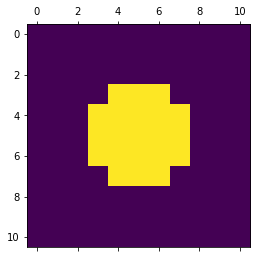

In [6]:
%matplotlib inline
import matplotlib.pyplot as pl

pl.matshow(k2.k2sff_best_aper_mask)

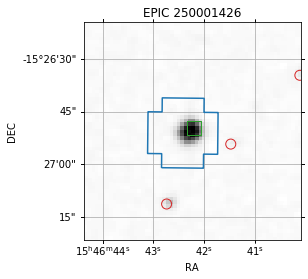

In [7]:
ax = k2.plot_gaia_sources_on_survey(survey="DSS2 Red") 

## grid

In [8]:
epics = """201663879,
201663913,
201796690,
245944983,
246074965,
246163416,
246313886,
246331347,
246331418,
246472939,
246909566,
248480671,
248558190,
248616368,
248639308,
248775938,
248782482,
249384674,
249391469,
249557502,
249826231,
250001426,
250099723,
247335861""".split(',')

In [11]:
k2.target_coord.ra

<Longitude 355.128368 deg>


0it [00:00, ?it/s]

Available campaigns: [14]
Using campaign=14.



1it [00:10, 10.36s/it]

Available campaigns: [14]
Using campaign=14.



2it [00:19,  9.94s/it]

Available campaigns: [14]
Using campaign=14.



3it [00:28,  9.73s/it]

Available campaigns: [12 12]
Using campaign=12.



4it [00:38,  9.74s/it]

Available campaigns: [12 19]
Using campaign=12.



5it [00:46,  9.32s/it]

Available campaigns: [12]
Using campaign=12.



6it [00:56,  9.40s/it]

Available campaigns: [12 19]
Using campaign=12.



7it [01:17, 12.87s/it]

Available campaigns: [12 19]
Using campaign=12.



8it [01:26, 11.84s/it]

Available campaigns: [12 19]
Using campaign=12.



9it [01:42, 13.04s/it]

Available campaigns: [12]
Using campaign=12.



10it [01:51, 11.89s/it]

Available campaigns: [13]
Using campaign=13.



11it [02:02, 11.43s/it]

Available campaigns: [14]
Using campaign=14.



12it [02:21, 13.91s/it]

Available campaigns: [14]
Using campaign=14.



13it [02:41, 15.65s/it]

Available campaigns: [14]
Using campaign=14.



14it [02:56, 15.61s/it]

Available campaigns: [14]
Using campaign=14.



15it [03:17, 17.09s/it]

Available campaigns: [14]
Using campaign=14.



16it [03:32, 16.61s/it]

Available campaigns: [14]
Using campaign=14.



17it [03:44, 15.17s/it]

Available campaigns: [15]
Using campaign=15.



18it [03:56, 14.12s/it]

Available campaigns: [15]
Using campaign=15.



19it [04:09, 13.71s/it]

Available campaigns: [15]
Using campaign=15.



20it [04:20, 12.92s/it]

Available campaigns: [15]
Using campaign=15.



21it [04:31, 12.44s/it]

Available campaigns: [15]
Using campaign=15.



22it [04:42, 12.07s/it]

Available campaigns: [15]
Using campaign=15.



23it [04:55, 12.14s/it]

Available campaigns: [13]
Using campaign=13.



24it [05:07, 12.31s/it]


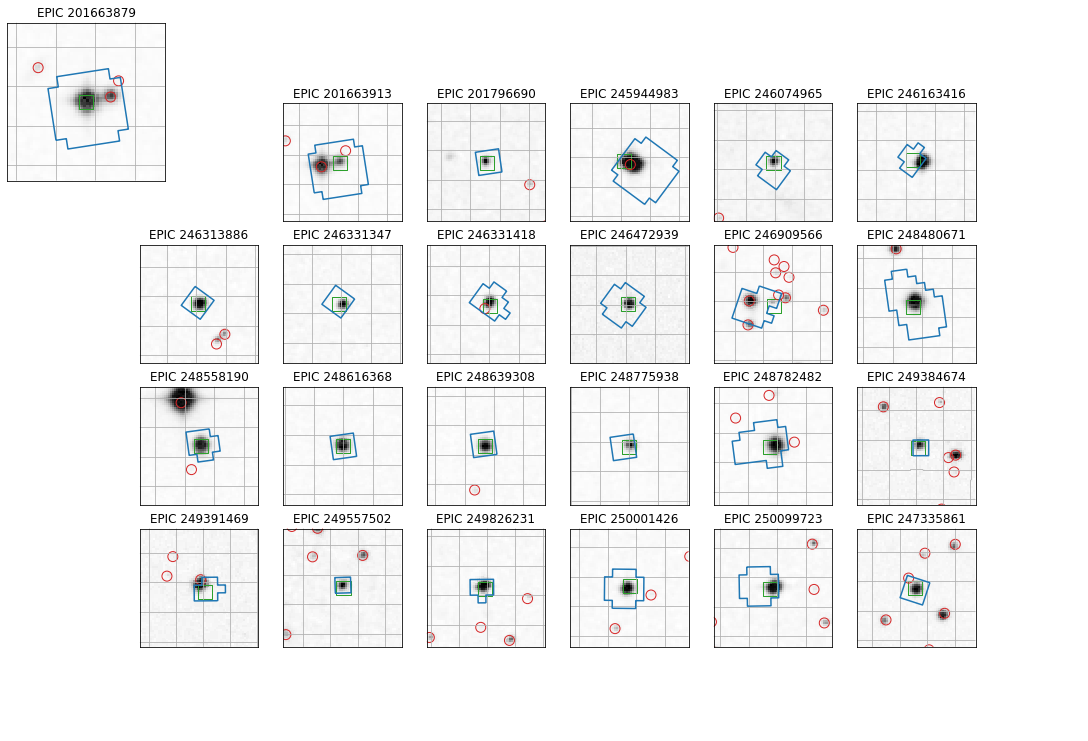

In [12]:
from pathlib import Path
import matplotlib.pyplot as pl
from astroquery.skyview import SkyView
from astropy.wcs import WCS
import astropy.units as u
import deepdish as dd 
from tqdm import tqdm

fig = pl.figure(figsize=(15,10), constrained_layout=True)

survey = "DSS2 Red"
fov_rad = 60*u.arcsec
    
for i,epic in tqdm(enumerate(epics)):
    try:
        k2 = cr.K2sff(epicid=int(epic), verbose=False)
        # fetch survey image hdu
        position = k2.target_coord.icrs.to_string()
        results = SkyView.get_images(position=position, coordinates='icrs',
                                 survey=survey, radius=fov_rad, grid=False)
        if len(results)>0:
            hdu = results[0][0]
        else:
            errmsg = "SkyView returned empty result. Try a different survey."
            raise ValueError(errmsg)
        # create subplot with projection based on hdu image
        ax = fig.add_subplot(4,6,i+1, projection=WCS(hdu.header))
        # plot
        ax2 = k2.plot_gaia_sources_on_survey(ax=ax, survey=survey, fov_rad=fov_rad)
        # cleanup axes
        r = ax2.coords['ra']
        d = ax2.coords['dec']
        r.set_ticks_visible(False)
        r.set_ticklabel_visible(False)
        d.set_ticks_visible(False)
        d.set_ticklabel_visible(False)
    except Exception as e:
        print(f"Error: {e}")
# fig.subplots_adjust(hspace=0)
# fig.subplots_adjust(wspace=0)

In [13]:
fig.savefig('aperture_grid.png', bbox_inches='tight')